In [10]:
# Import libraries
import numpy as np
import pandas as pd
import os
import geopy.distance as distance
import random
import pickle
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})
import statsmodels.api as sm

## Time in Hours

In [17]:
# open the statistics for linear interpolation
with (open('/scratch/skp454/Trajectory/TaxiDataSet/data/20190709_TaxiLinearInterpolationTimeLong.pkl', "rb")) as openfile:
    maskStat = pickle.load(openfile, encoding = 'latin1')

0


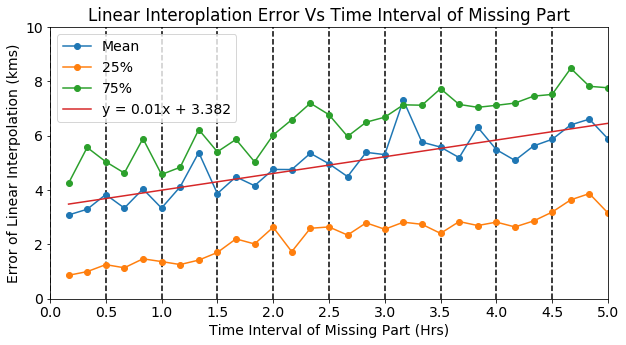

In [19]:
# Plot
mean = []
q_one = []
q_three = []
key = []
for k in maskStat.keys():
    key.append(k/60 + 10)
    mean.append(maskStat[k]['mean'])
    q_one.append(maskStat[k]['25%'])
    q_three.append(maskStat[k]['75%'])
X = sm.add_constant(key)
model = sm.OLS(mean,X)
results = model.fit()
plt.subplots(figsize=(10,5))
plt.plot(key, mean, '-' ,label = 'Mean', marker = 'o')
plt.plot(key, q_one, '-' ,label = '25%',  marker = 'o')
plt.plot(key, q_three, '-' ,label = '75%' , marker = 'o')
plt.plot(key, results.predict(), '-' ,label = 'y = '+str(np.round(results.params[1],3))+'x + '+str(np.round(results.params[0],3)))
for k in np.arange(0,300,30):
     plt.vlines(k, 0, 40, color ='black',linestyles='dashed')
plt.legend()
plt.xlabel('Time Interval of Missing Part (Hrs)')
plt.ylabel('Error of Linear Interpolation (kms)')
plt.xticks(np.arange(0,301,30), np.arange(0,5.1,0.5))
plt.ylim(0,10)
plt.xlim(0,300)
plt.title("Linear Interoplation Error Vs Time Interval of Missing Part")
print('0')
plt.savefig('LinearInterpolationTime.png')

## Time in Minutes

In [20]:
# open the statistics for linear interpolation
with (open('/scratch/skp454/Trajectory/TaxiDataSet/data/20190709_TaxiLinearInterpolationTimeShort.pkl', "rb")) as openfile:
    maskStat = pickle.load(openfile, encoding = 'latin1')

0


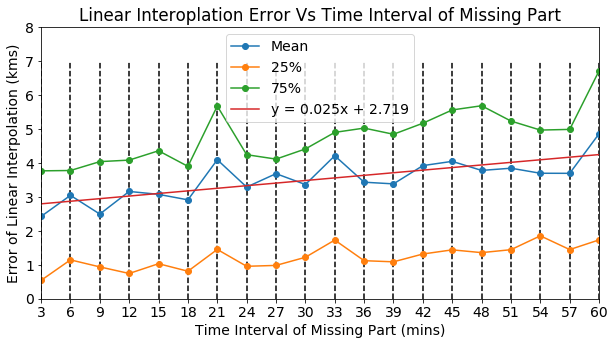

In [29]:
# Plot
mean = []
q_one = []
q_three = []
key = []
for k in maskStat.keys():
    key.append(k/60 + 3)
    mean.append(maskStat[k]['mean'])
    q_one.append(maskStat[k]['25%'])
    q_three.append(maskStat[k]['75%'])
X = sm.add_constant(key)
model = sm.OLS(mean,X)
results = model.fit()
plt.subplots(figsize=(10,5))
plt.plot(key, mean, '-' ,label = 'Mean', marker = 'o')
plt.plot(key, q_one, '-' ,label = '25%',  marker = 'o')
plt.plot(key, q_three, '-' ,label = '75%' , marker = 'o')
plt.plot(key, results.predict(), '-' ,label = 'y = '+str(np.round(results.params[1],3))+'x + '+str(np.round(results.params[0],3)))
for k in key:
     plt.vlines(k, 0, 7, color ='black',linestyles='dashed')
plt.legend()
plt.xlabel('Time Interval of Missing Part (mins)')
plt.ylabel('Error of Linear Interpolation (kms)')
plt.xticks(np.arange(0,61,3), np.arange(0,61,3))
plt.ylim(0,8)
plt.xlim(3,60)
plt.title("Linear Interoplation Error Vs Time Interval of Missing Part")
print('0')
plt.savefig('LinearInterpolationTime1.png')

## Distance in 10 Kms

In [30]:
# open the statistics for linear interpolation
with (open('/scratch/skp454/Trajectory/TaxiDataSet/data/20190709_TaxiLinearInterpolationDistLong.pkl', "rb")) as openfile:
    maskStat = pickle.load(openfile, encoding = 'latin1')

0


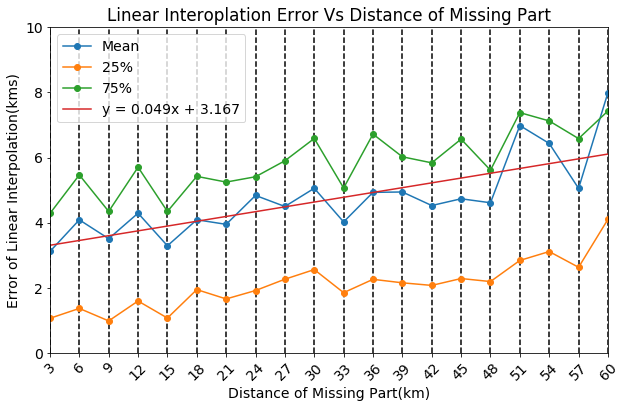

In [37]:
# Plot
mean = []
q_one = []
q_three = []
key = []
for k in maskStat.keys():
    key.append(k+3)
    mean.append(maskStat[k]['mean'])
    q_one.append(maskStat[k]['25%'])
    q_three.append(maskStat[k]['75%'])
X = sm.add_constant(key)
model = sm.OLS(mean,X)
results = model.fit()

plt.subplots(figsize=(10,6))
plt.plot(key, mean, '-' ,label = 'Mean', marker = 'o')
plt.plot(key, q_one, '-' ,label = '25%',  marker = 'o')
plt.plot(key, q_three, '-' ,label = '75%' , marker = 'o')
plt.plot(key, results.predict(), '-' ,label = 'y = '+str(np.round(results.params[1],3))+'x + '+str(np.round(results.params[0],3)))

for k in key:
    plt.vlines(k, 0, 10, color ='black',linestyles='dashed')
plt.legend()
plt.xlabel('Distance of Missing Part(km)')
plt.ylabel('Error of Linear Interpolation(kms)')
plt.xticks(np.arange(0,61,3), rotation =45)
plt.xlim(3,60)
plt.ylim(0,10)
plt.title("Linear Interoplation Error Vs Distance of Missing Part")
print('0')
plt.savefig('LinearInterpolationDist.png')

## Distance in Metres

In [39]:
# open the statistics for linear interpolation
with (open('/scratch/skp454/Trajectory/TaxiDataSet/data/20190709_TaxiLinearInterpolationDistShort.pkl', "rb")) as openfile:
    maskStat = pickle.load(openfile, encoding = 'latin1')

0


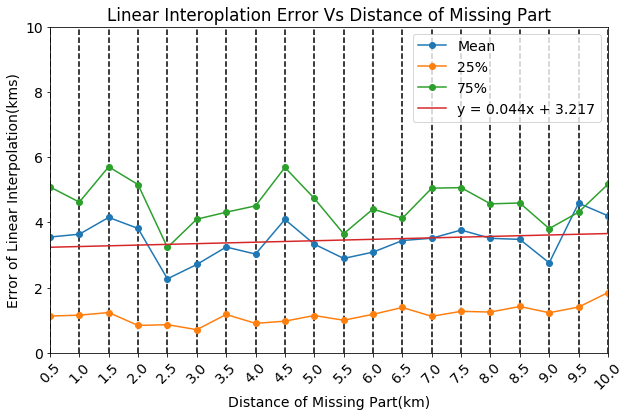

In [44]:
# Plot
mean = []
q_one = []
q_three = []
key = []
for k in maskStat.keys():
    key.append(k)
    mean.append(maskStat[k]['mean'])
    q_one.append(maskStat[k]['25%'])
    q_three.append(maskStat[k]['75%'])
X = sm.add_constant(key)
model = sm.OLS(mean,X)
results = model.fit()

plt.subplots(figsize=(10,6))
plt.plot(key, mean, '-' ,label = 'Mean', marker = 'o')
plt.plot(key, q_one, '-' ,label = '25%',  marker = 'o')
plt.plot(key, q_three, '-' ,label = '75%' , marker = 'o')
plt.plot(key, results.predict(), '-' ,label = 'y = '+str(np.round(results.params[1],3))+'x + '+str(np.round(results.params[0],3)))

for k in key:
    plt.vlines(k, 0, 30, color ='black',linestyles='dashed')
plt.legend()
plt.xlabel('Distance of Missing Part(km)')
plt.ylabel('Error of Linear Interpolation(kms)')
plt.xticks(np.arange(0,10.1,0.5), rotation =45)
plt.xlim(0.5,10)
plt.ylim(0,10)
plt.title("Linear Interoplation Error Vs Distance of Missing Part")
print('0')
plt.savefig('LinearInterpolationDist1.png')